In [3]:
import numpy as np
import matplotlib.pyplot as plt

STARTER ALGORITHM - G-H FILTER (PSEUDO-CODE)

In this starter code, we provide a basic implementation of the g-h filter algorithm. This implementation estimates the position and velocity of an object based on noisy measurements. The g-h filter is a simple yet effective method for tracking objects in one-dimensional space. The algorithm takes in a series of measurements, initial estimates for position and velocity, gain parameters (g and h), and the time step (dt). It iteratively updates the position and velocity estimates based on the measurements and the specified gains.

In [21]:
def gh_filters(z, x0, v0, g, h, dt):
    N = len(z)

    x_est  = np.zeros(N)
    v_est  = np.zeros(N)

    x_est[0] = x0
    v_est[0] = v0

    for k in range(1, N):
        x_pred = x_est[k-1] + v_est[k-1]*dt
        v_pred = v_est[k-1]

        r = z[k] - x_pred

        x_est[k] = x_pred + g * r
        v_est[k] = v_pred + (h * r) / dt

    return x_est, v_est

### Question 1

In this question, we will implement the g-h filter algorithm to estimate the position and velocity of an object based on noisy measurements. We will generate synthetic data for a moving object, apply the g-h filter, and evaluate its performance using Root Mean Square Error (RMSE) and Mean Absolute Innovation (MAI) metrics.

RMSE: 1.137
MAI: 1.992


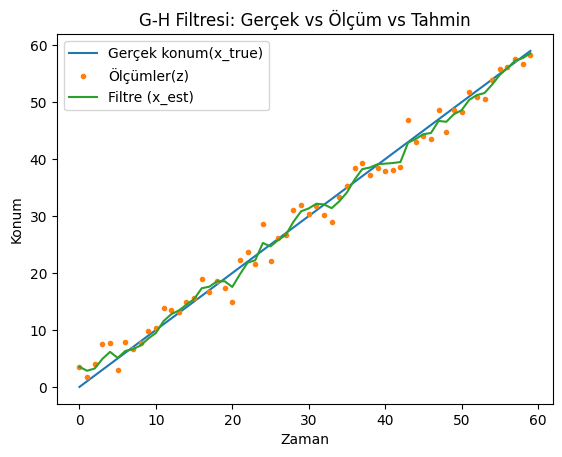

In [157]:
def gh_filters(z, x0, v0, g, h, dt):
    N = len(z)

    x_est  = np.zeros(N)
    v_est  = np.zeros(N)
    x_pred_series = np.zeros(N)

    x_est[0] = x0
    v_est[0] = v0
    x_pred_series[0] = x0

    for k in range(1, N):
        x_pred = x_est[k-1] + v_est[k-1]*dt
        v_pred = v_est[k-1]

        r = z[k] - x_pred

        x_est[k] = x_pred + g * r
        v_est[k] = v_pred + (h * r) / dt

        x_pred_series[k] = x_pred

    return x_est, v_est, x_pred_series

np.random.seed(0)
N = 60
dt = 1.0
x0_true, v_true = 0.0, 1.0
t = np.arange(N) * dt
x_true = x0_true + v_true * t
sigma = 2.0
z = x_true + np.random.normal(0, sigma, size=N)
x0, v0 = z[0], 0.0

g, h = 0.4, 0.05

x_est, v_est, x_pred = gh_filters(z, x0, v0, g, h, dt)

rmse = np.sqrt(np.mean((x_est - x_true)**2))

mai = np.mean(np.abs(z[1:] - x_pred[1:]))

print(f"RMSE: {rmse:.3f}")
print(f"MAI: {mai:.3f}")

plt.figure()
plt.plot(t, x_true, label="Gerçek konum(x_true)")
plt.plot(t, z, ".", label="Ölçümler(z)")
plt.plot(t, x_est, label="Filtre (x_est)")
plt.xlabel("Zaman")
plt.ylabel("Konum")
plt.title("G-H Filtresi: Gerçek vs Ölçüm vs Tahmin")
plt.legend()
plt.show()

### Question 2

In this question, we will investigate the impact of initial conditions on the performance of the g-h filter. We will compare the filter's performance with good and bad initial guesses for position and velocity. The goal is to observe how the choice of initial conditions affects the filter's ability to converge to the true state of the system. Plotting the results will help visualize the differences in performance. Giving the g value a high value (e.g., g=1) and h a very low value (e.g., h=0.0001) in the bad initial guess case will help to stress test the filter's robustness to poor initial conditions.

Good RMSE:  1.1370008139990486
Good MAI:  1.991828343141762
Bad RMSE:  25.903199991566055
Bad MAI:  5.645877545713657


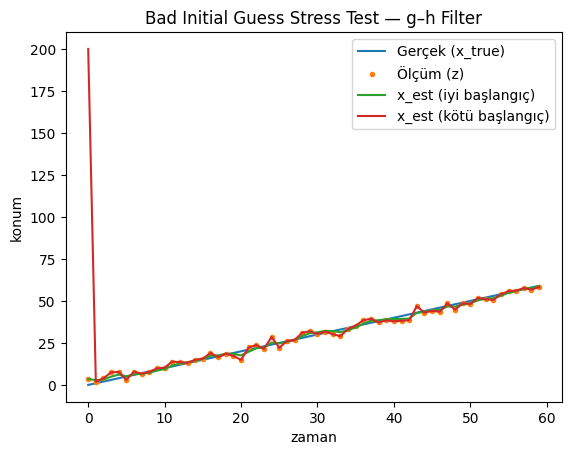

In [102]:
def gh_filters(z, x0, v0, g, h, dt):
    N = len(z)

    x_est  = np.zeros(N)
    v_est  = np.zeros(N)
    x_pred_series = np.zeros(N)

    x_est[0] = x0
    v_est[0] = v0
    x_pred_series[0] = x0

    for k in range(1, N):
        x_pred = x_est[k-1] + v_est[k-1] * dt
        v_pred = v_est[k-1]

        r = z[k] - x_pred

        x_est[k] = x_pred + g * r
        v_est[k] = v_pred + (h * r) / dt

        x_pred_series[k] = x_pred

    return x_est, v_est, x_pred_series

np.random.seed(0)
N = 60
dt = 1.0
x0_true, v_true = 0.0, 1.0
t = np.arange(N) * dt
x_true = x0_true + v_true * t
sigma = 2.0
z = x_true + np.random.normal(0, sigma, size=N)

g, h = 0.4, 0.05

# 1) İyi başlangıç
x0_good, v0_good = z[0], 0.0
x_est_g, v_est_g, x_pred_g = gh_filters(z, x0_good, v0_good, g, h, dt)

g, h = 1, 0.0001

# 2) Kötü başlangıç (stress): büyük ofset
x0_bad, v0_bad = 200.0, 0.0
x_est_b, v_est_b, x_pred_b = gh_filters(z, x0_bad, v0_bad, g, h, dt)

def rmse(a,b):
    return np.sqrt(np.mean((a - b)**2))

def mai(z, x_pred):
    return np.mean(np.abs(z[1:] - x_pred[1:]))

print(f"Good RMSE: ", rmse(x_est_g, x_true))
print(f"Good MAI: ", mai(z,x_pred_g))
print("Bad RMSE: ", rmse(x_est_b, x_true))
print("Bad MAI: ", mai(z,x_pred_b))

plt.figure()
plt.plot(t, x_true, label="Gerçek (x_true)")
plt.plot(t, z, ".", label="Ölçüm (z)", alpha=1)
plt.plot(t, x_est_g, label="x_est (iyi başlangıç)")
plt.plot(t, x_est_b, label="x_est (kötü başlangıç)")
plt.xlabel("zaman")
plt.ylabel("konum")
plt.title("Bad Initial Guess Stress Test — g–h Filter")
plt.legend(); plt.show()

### Question 3

In this question, we will explore the effect of measurement noise on the performance of the g-h filter. We will run the filter with different levels of measurement noise (sigma_z) and tune the gain parameter g to minimize the RMSE for each noise level. The goal is to observe how the optimal g value changes with increasing noise and how it affects the filter's ability to estimate the true state of the system. We will plot the results for different noise levels to visualize the filter's performance.

sigma_z=  10.0  ->  best g=0.22,  RMSE=5.773
sigma_z= 100.0  ->  best g=0.23,  RMSE=57.710


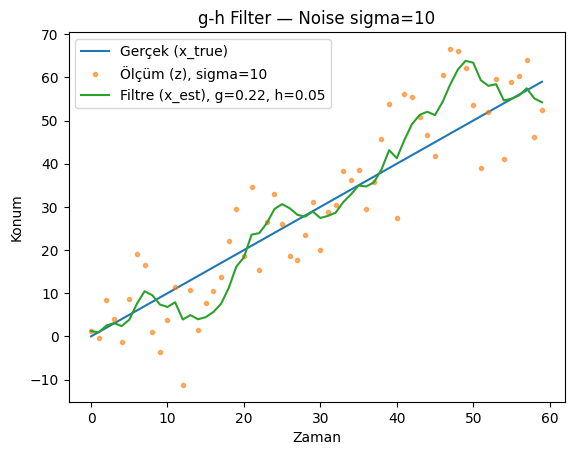

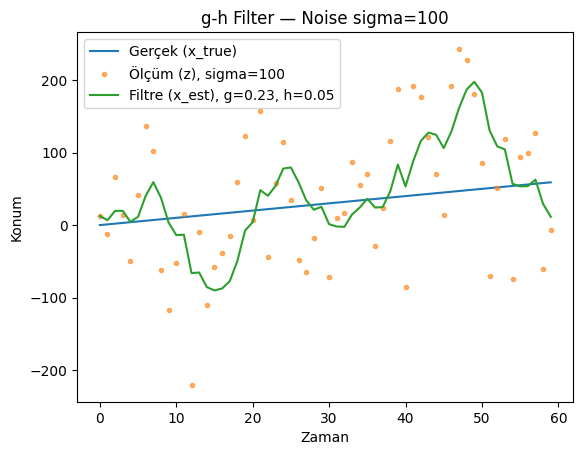

In [116]:
def gh_filters(z, x0, v0, g, h, dt):
    N = len(z)

    x_est  = np.zeros(N)
    v_est  = np.zeros(N)
    x_pred_series = np.zeros(N)

    x_est[0] = x0
    v_est[0] = v0
    x_pred_series[0] = x0

    for k in range(1, N):
        x_pred = x_est[k-1] + v_est[k-1]*dt
        v_pred = v_est[k-1]

        r = z[k] - x_pred

        x_est[k] = x_pred + g * r
        v_est[k] = v_pred + (h * r) / dt

        x_pred_series[k] = x_pred

    return x_est, v_est, x_pred_series

N = 60
dt = 1.0
x0_true, v_true = 0.0, 1.0
t = np.arange(N) * dt
x_true = x0_true + v_true * t

g_grid = np.linspace(0.05, 0.80, 75)
h_fixed = 0.05

def run_case(sigma_z, g_candidates=g_grid, h=h_fixed, seed=0):
    rng = np.random.default_rng(seed)
    # Aynı true yörüngeyi koruyup sadece ölçüm gürültüsünü değiştiriyoruz
    z = x_true + rng.normal(0, sigma_z, size=N)

    # g'yi tune et: aynı gürültü serisi üzerinde tüm g'leri dene (adil karşılaştırma)
    best_rmse, best_g, best_x_est, best_x_pred = np.inf, None, None, None
    for gg in g_candidates:
        x_est, v_est, x_pred = gh_filters(z, x0=z[0], v0=0.0, g=gg, h=h, dt=dt)
        rmse = np.sqrt(np.mean((x_est - x_true) ** 2))
        if rmse < best_rmse:
            best_rmse, best_g, best_x_est, best_x_pred = rmse, gg, x_est, x_pred

    return {
        "sigma": sigma_z,
        "g": best_g,
        "rmse": best_rmse,
        "z": z,
        "x_est": best_x_est,
        "x_pred": best_x_pred,
    }

results = []
for sigma in [10.0, 100.0]:
    res = run_case(sigma_z=sigma, seed=0)
    results.append(res)
    print(f"sigma_z={sigma:>6.1f}  ->  best g={res['g']:.2f},  RMSE={res['rmse']:.3f}")

for res in results:
    plt.figure()
    plt.plot(t, x_true, label="Gerçek (x_true)")
    plt.plot(t, res["z"], ".", alpha=0.6, label=f"Ölçüm (z), sigma={res['sigma']:.0f}")
    plt.plot(t, res["x_est"], label=f"Filtre (x_est), g={res['g']:.2f}, h={h_fixed}")
    plt.xlabel("Zaman")
    plt.ylabel("Konum")
    plt.title(f"g-h Filter — Noise sigma={res['sigma']:.0f}")
    plt.legend()
    plt.show()

### Question 4

In this question, we will implement both the g-h filter and the g-h-k filter to estimate the position, velocity, and acceleration of an object undergoing constant acceleration. We will generate synthetic data for an accelerating object, apply both filters, and compare their performance using Root Mean Square Error (RMSE) metrics. The g-h-k filter is expected to perform better in this scenario due to its ability to account for acceleration in the state estimation.

RMSE g-h   : 5.833
RMSE g-h-k : 2.086


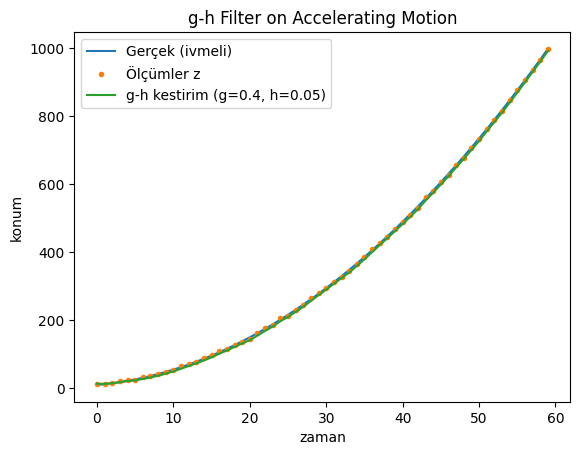

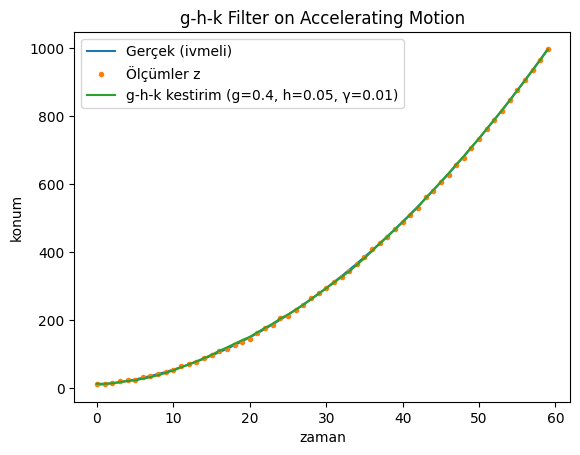

In [132]:
# ----------------------------
# g-h (alpha-beta) filtresi
# ----------------------------
def gh_filters(z, x0, v0, g, h, dt):
    N = len(z)

    x_est = np.zeros(N)
    v_est = np.zeros(N)

    x_est[0] = x0
    v_est[0] = v0

    for k in range(1, N):
        x_pred = x_est[k-1] + v_est[k-1] * dt
        v_pred = v_est[k-1]

        r = z[k] - x_pred

        x_est[k] = x_pred + g * r
        v_est[k] = v_pred + (h * r) / dt
    return x_est, v_est

# ----------------------------
# g-h-k (alpha-beta-gamma) filtresi
# Sabit ivme modeli
# ----------------------------
def ghk_filter(z, x0, v0, a0, g, h, gamma, dt):
    N = len(z)

    x = np.zeros(N)
    v = np.zeros(N)
    a = np.zeros(N)

    x[0], v[0], a[0] = x0, v0, a0

    for k in range(1, N):

        x_pred = x[k-1] + v[k-1] * dt + 0.5 * a[k-1] * (dt**2)
        v_pred = v[k-1] + a[k-1] * dt
        a_pred = a[k-1]

        r = z[k] - x_pred

        x[k] = x_pred + g * r
        v[k] = v_pred + (h * r) / dt
        a[k] = a_pred + (2 * gamma * r) / (dt**2)
    return x, v, a

np.random.seed(0)
N = 60
dt = 1.0
t = np.arange(N)*dt

x0_true, v0_true, a_true = 10.0, 2.0, 0.5
x_true = x0_true + v0_true * t + 0.5 * a_true * (t**2)

sigma = 2.0
z = x_true + np.random.normal(0, sigma, size=N)

g, h = 0.4, 0.05
x_est_gh, v_est_gh = gh_filters(z, x0=z[0], v0=0.0, g=g, h=h, dt=dt)

gamma = 0.01
x_est_ghk, v_est_ghk, a_est_ghk = ghk_filter(z, x0=z[0], v0=0.0, a0=0.0,
                                             g=g, h=h, gamma=gamma, dt=dt)

rmse_gh  = np.sqrt(np.mean((x_est_gh  - x_true)**2))
rmse_ghk = np.sqrt(np.mean((x_est_ghk - x_true)**2))
print(f"RMSE g-h   : {rmse_gh:.3f}")
print(f"RMSE g-h-k : {rmse_ghk:.3f}")

# ----------------------------
# Grafik 1: g-h
# ----------------------------
plt.figure()
plt.plot(t, x_true, label="Gerçek (ivmeli)")
plt.plot(t, z, ".", label="Ölçümler z")
plt.plot(t, x_est_gh, label=f"g-h kestirim (g={g}, h={h})")
plt.xlabel("zaman")
plt.ylabel("konum")
plt.title("g-h Filter on Accelerating Motion")
plt.legend()
plt.show()

# ----------------------------
# Grafik 2: g-h-k
# ----------------------------
plt.figure()
plt.plot(t, x_true, label="Gerçek (ivmeli)")
plt.plot(t, z, ".", label="Ölçümler z")
plt.plot(t, x_est_ghk, label=f"g-h-k kestirim (g={g}, h={h}, γ={gamma})")
plt.xlabel("zaman")
plt.ylabel("konum")
plt.title("g-h-k Filter on Accelerating Motion")
plt.legend()
plt.show()


### Question 5

In this question, we will analyze the effect of the gain parameter g on the performance of the g-h filter under different levels of measurement noise. We will run the g-h filter with various g values and two different noise levels (light and heavy) and evaluate the filter's performance using Root Mean Square Error (RMSE). The goal is to observe how the choice of g affects the filter's ability to estimate the true position of the object in the presence of noise.

Sigma_z = 10, h = 0.3
  g = 0.01  ->  RMSE = 13.897
  g =  0.1  ->  RMSE = 9.537
  g =  0.8  ->  RMSE = 8.228
Sigma_z = 50, h = 0.3
  g = 0.01  ->  RMSE = 69.325
  g =  0.1  ->  RMSE = 47.639
  g =  0.8  ->  RMSE = 41.142


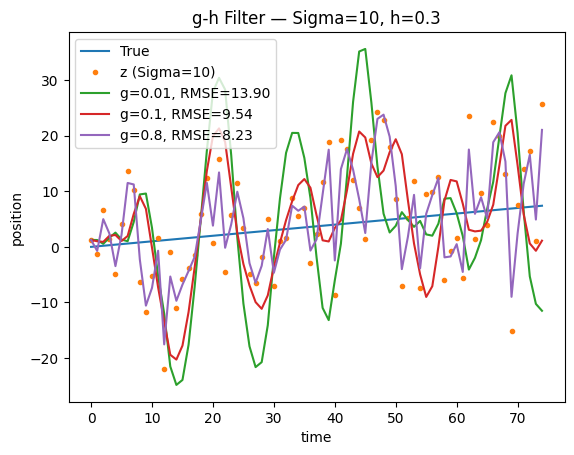

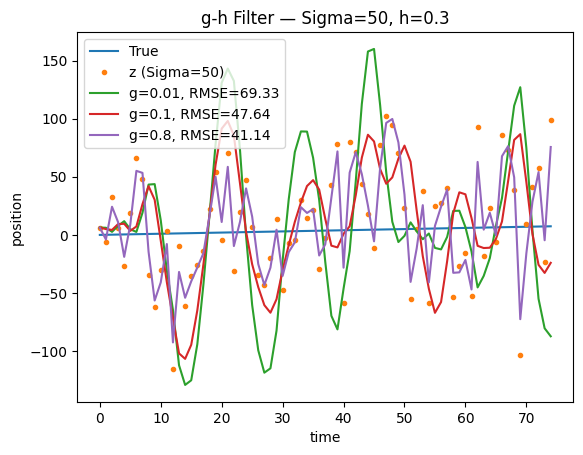

In [155]:
def gh_filter(z, x0, v0, g, h, dt):
    N = len(z)

    x_est = np.zeros(N)
    v_est = np.zeros(N)

    x_est[0] = x0
    v_est[0] = v0

    for k in range(1, N):

        x_pred = x_est[k-1] + v_est[k-1] * dt
        v_pred = v_est[k-1]

        r = z[k] - x_pred

        x_est[k] = x_pred + g * r
        v_est[k] = v_pred + (h * r) / dt
    return x_est, v_est


N = 75
dt = 1.0
t = np.arange(N)*dt
x0_truev_true = 0.0, 1.0
x_true = x0_true + v_true * t

h = 0.3
g_list = [0.01, 0.1, 0.8]
sigmas = [10.0, 50.0]   # light vs heavy noise

def RMSE(a, b):
    return np.sqrt(np.mean((a-b)**2))

def run_sigma(sigma, seed=0):
    rng = np.random.default_rng(seed)
    z = x_true + rng.normal(0, sigma, size=N)
    rows = []
    for g in g_list:
        x_est, v_est = gh_filter(z, x0=z[0], v0=0.0, g=g, h=h, dt=dt)
        rmse = RMSE(x_est, x_true)
        rows.append((g, rmse, x_est, z))
    return rows

for sigma in sigmas:
    results = run_sigma(sigma, seed=0)
    print(f"Sigma_z = {sigma:.0f}, h = {h}")
    for g, rmse, _, _ in results:
        print(f"  g = {g:>4}  ->  RMSE = {rmse:.3f}")


for sigma in sigmas:
    results = run_sigma(sigma, seed=0)
    plt.figure()
    plt.plot(t, x_true, label="True")
    plt.plot(t, results[0][3], ".", label=f"z (Sigma={sigma:.0f})")
    for g, rmse, x_est, _ in results:
        plt.plot(t, x_est, label=f"g={g}, RMSE={rmse:.2f}")
    plt.xlabel("time")
    plt.ylabel("position")
    plt.title(f"g-h Filter — Sigma={sigma:.0f}, h={h}")
    plt.legend()
    plt.show()

### Question 6

In this question, we will investigate the role of the gain parameter h in the g-h filter. We will run the filter with different h values while keeping the initial velocity guess constant. The goal is to observe how the choice of h affects the filter's ability to estimate the true position of the object, especially when the initial velocity guess is poor. We will evaluate the filter's performance using Root Mean Square Error (RMSE) and plot the results for comparison.

RMSE (doğru v0,  h=0.05): 1.227
RMSE (kötü  v0,  h=0.05): 1.787
RMSE (kötü  v0,  h=0.5 ): 1.827


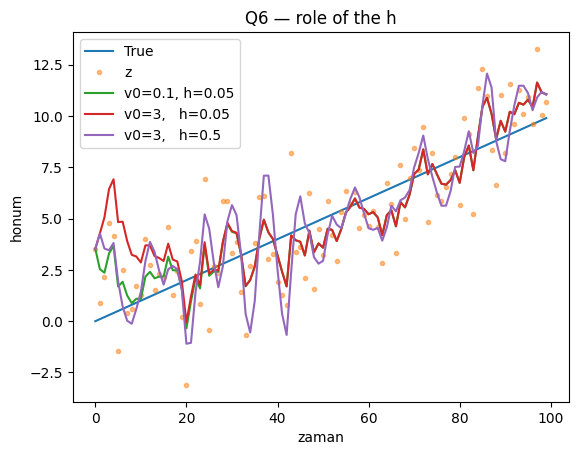

In [158]:
def gh_filters(z, x0, v0, g, h, dt):
    N = len(z)

    x = np.zeros(N)
    v = np.zeros(N)

    x[0], v[0] = x0, v0

    for k in range(1, N):
        x_pred = x[k-1] + v[k-1]*dt
        v_pred = v[k-1]

        r = z[k] - x_pred

        x[k] = x_pred + g * r
        v[k] = v_pred + (h * r) / dt
    return x

np.random.seed(0)
N, dt = 100, 1.0
v_true, x0_true = 0.1, 0.0
t = np.arange(N)*dt
x_true = x0_true + v_true*t
sigma = 2.0
z = x_true + np.random.normal(0, sigma, size=N)

g = 0.4

# Üç durum
x_good  = gh_filters(z, x0=z[0], v0=0.1, g=g, h=0.05, dt=dt)  # doğru hız başlangıcı
x_poor  = gh_filters(z, x0=z[0], v0=3.0, g=g, h=0.05, dt=dt)  # kötü hız, küçük h
x_poorH = gh_filters(z, x0=z[0], v0=3.0, g=g, h=0.5,  dt=dt)  # kötü hız, büyük h

rmse = lambda x: np.sqrt(np.mean((x - x_true)**2))
print(f"RMSE (doğru v0,  h=0.05): {rmse(x_good):.3f}")
print(f"RMSE (kötü  v0,  h=0.05): {rmse(x_poor):.3f}")
print(f"RMSE (kötü  v0,  h=0.5 ): {rmse(x_poorH):.3f}")


plt.plot(t, x_true, label="True")
plt.plot(t, z, ".", alpha=0.5, label="z")
plt.plot(t, x_good,  label="v0=0.1, h=0.05")
plt.plot(t, x_poor,  label="v0=3,   h=0.05")
plt.plot(t, x_poorH, label="v0=3,   h=0.5")
plt.legend(); plt.xlabel("zaman")
plt.ylabel("honum")
plt.title("Q6 — role of the h")
plt.show()